<a href="https://colab.research.google.com/github/Hamza-benAmmar/PPP_Essai/blob/main/Copy_of_Emotion_Classification_using_Bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow_text
!pip install tensorflow_hub
!pip install transformers
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
#from transformers import TFAutoModel, AutoTokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

data=pd.read_csv('/content/concatenated_data.csv')

In [ ]:
data=data.loc[:,['sentiment','content']]
copy=data.copy()
data['sentiment'].value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: sentiment, dtype: int64

In [ ]:
data.isnull().sum()


sentiment    0
content      0
dtype: int64

In [ ]:
data.duplicated().sum()


1

In [ ]:
data[data['content'].duplicated() == True]

,sentiment,content
5067,joy,i feel on the verge of tears from weariness i ...
6133,love,i still feel a craving for sweet food
6563,anger,i tend to stop breathing when i m feeling stre...
7623,sadness,i was intensely conscious of how much cash i h...
7685,surprise,im still not sure why reilly feels the need to...
8246,love,i am not amazing or great at photography but i...
9596,joy,ive also made it with both sugar measurements ...
9687,joy,i had to choose the sleek and smoother feel of...
9769,sadness,i often find myself feeling assaulted by a mul...
9786,joy,i feel im being generous with that statement


In [ ]:
index = data[data['content'].duplicated() == True].index
data.drop(index, axis = 0, inplace = True)
data.reset_index(inplace=True, drop = True)

In [ ]:
data['sentiment'].value_counts()

joy         6739
sadness     5793
anger       2703
fear        2369
love        1630
surprise     714
Name: sentiment, dtype: int64

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stop_words=stopwords.words("english")
from nltk.stem import WordNetLemmatizer

def lemmatization(text):
    lemmatizer= WordNetLemmatizer()

    text = text.split()

    text=[lemmatizer.lemmatize(y) for y in text]
    
    return " " .join(text)

def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):
    
    text = text.split()

    text=[y.lower() for y in text]
    
    return " " .join(text)

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan
            
def normalize_text(data):
    data["content"]=data["content"].apply(lambda text : Removing_urls(text))
    data["content"]=data["content"].apply(lambda text : lower_case(text))
    data["content"]=data["content"].apply(lambda text : remove_stop_words(text))
    data["content"]=data["content"].apply(lambda text : Removing_numbers(text))
    data["content"]=data["content"].apply(lambda text : Removing_punctuations(text)) 
    data["content"]=data["content"].apply(lambda text : lemmatization(text))
    return data

def normalized_sentence(sentence):
    sentence= lower_case(sentence)
    sentence= remove_stop_words(sentence)
    sentence= Removing_numbers(sentence)
    sentence= Removing_punctuations(sentence)
    sentence= Removing_urls(sentence)
    sentence= lemmatization(sentence)
    return sentence

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
data=normalize_text(data)

In [ ]:
data['sentiment'].value_counts()

joy         6739
sadness     5793
anger       2703
fear        2369
love        1630
surprise     714
Name: sentiment, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['sentiment_label']=le.fit_transform(data['sentiment'])
data['sentiment_label'].value_counts()


2    6739
4    5793
0    2703
1    2369
3    1630
5     714
Name: sentiment_label, dtype: int64

In [ ]:
max_length = 0
for sentence in data['content']:
    length = len(sentence.split())
    if length > max_length:
        max_length = length
max_length

35

In [ ]:
data['sentiment_label']

0        4
1        4
2        0
3        3
4        0
        ..
19943    0
19944    0
19945    2
19946    2
19947    1
Name: sentiment_label, Length: 19948, dtype: int64

In [ ]:
import numpy as np
labels = np.zeros((len(data), 6))
labels[np.arange(len(data)), data['sentiment_label'].values] = 1 # one-hot encoded target tensor

In [ ]:
from sklearn.model_selection import train_test_split
X=data['content']
y=labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train,random_state=42)

In [ ]:
X_train.shape , X_val.shape, X_test.shape

((13564,), (3391,), (2993,))

In [ ]:
from tqdm.auto import tqdm
import tensorflow as tf
from transformers import BertTokenizer

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
import numpy as np
def generate_data(X,y, tokenizer):
  input_ids = np.zeros((len(X), 35))
  attn_masks = np.zeros((len(X), 35))
  for i,text in tqdm(enumerate(X)):
      tokenized_text = tokenizer.encode_plus(
          text,
          max_length=35, 
          truncation=True, 
          padding='max_length', 
          add_special_tokens=True,
          return_tensors='tf'
      )
      input_ids[i, :] = tokenized_text.input_ids
      attn_masks[i, :] = tokenized_text.attention_mask
  return input_ids , attn_masks, tf.convert_to_tensor(y)

In [ ]:
train_ids, train_masks, y_train = generate_data(X_train, y_train, tokenizer)
val_ids, val_masks, y_val = generate_data(X_val, y_val, tokenizer)
test_ids, test_masks, y_test = generate_data(X_test, y_test, tokenizer)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [ ]:
# creating a data pipeline using tensorflow dataset utility, creates batches of data for easy loading...
train_data = tf.data.Dataset.from_tensor_slices((train_ids, train_masks, y_train))
val_data = tf.data.Dataset.from_tensor_slices((val_ids, val_masks, y_val))
test_data = tf.data.Dataset.from_tensor_slices((test_ids, test_masks, y_test))
train_data.take(1) # one sample data

<_TakeDataset element_spec=(TensorSpec(shape=(35,), dtype=tf.float64, name=None), TensorSpec(shape=(35,), dtype=tf.float64, name=None), TensorSpec(shape=(6,), dtype=tf.float64, name=None))>

In [ ]:
def SentimentDatasetMapFunction(input_ids, attn_masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attn_masks
    }, labels

train_data = train_data.map(SentimentDatasetMapFunction) # converting to required format for tensorflow dataset
val_data = val_data.map(SentimentDatasetMapFunction) 
test_data = test_data.map(SentimentDatasetMapFunction) 


In [ ]:
train_data = train_data.shuffle(1000).batch(16, drop_remainder=True) 
val_data = val_data.shuffle(1000).batch(16, drop_remainder=True) 
test_data = test_data.shuffle(1000).batch(16, drop_remainder=True) 

In [ ]:
from transformers import TFBertModel
model = TFBertModel.from_pretrained('bert-base-uncased') # bert base model with pretrained weights


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:

# defining 2 input layers for input_ids and attn_masks
input_ids = tf.keras.layers.Input(shape=(35,), name='input_ids', dtype='int32')
attn_masks = tf.keras.layers.Input(shape=(35,), name='attention_mask', dtype='int32')

bert_embds = model.bert(input_ids, attention_mask=attn_masks)[1] # 0 -> activation layer (3D), 1 -> pooled output layer (2D)
intermediate_layer = tf.keras.layers.Dense(512, activation='relu', name='intermediate_layer')(bert_embds)
output_layer = tf.keras.layers.Dense(6, activation='softmax', name='output_layer')(intermediate_layer) # softmax -> calcs probs of classes

sentiment_model = tf.keras.Model(inputs=[input_ids, attn_masks], outputs=output_layer)
sentiment_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 35)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 35)]         0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 35,                                            

In [ ]:
optim = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [ ]:
sentiment_model.compile(optimizer=optim, loss=loss_func, metrics=[acc])

In [ ]:
hist = sentiment_model.fit(
    train_data,
    validation_data=val_data,
    epochs=3, 
)

Epoch 1/3
847/847 [==============================] - 119s 140ms/step - loss: 0.1987 - accuracy: 0.9275 - val_loss: 0.1544 - val_accuracy: 0.9331
Epoch 2/3
847/847 [==============================] - 116s 137ms/step - loss: 0.1238 - accuracy: 0.9461 - val_loss: 0.1314 - val_accuracy: 0.9378
Epoch 3/3
847/847 [==============================] - 115s 136ms/step - loss: 0.0979 - accuracy: 0.9545 - val_loss: 0.1408 - val_accuracy: 0.9387


In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

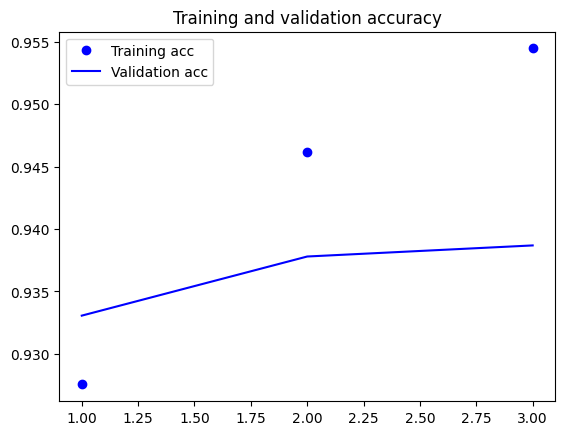

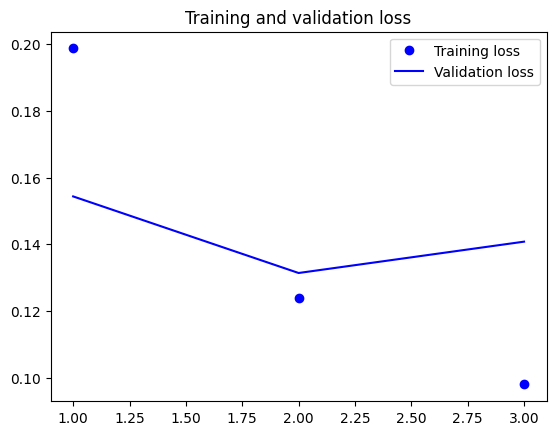

In [ ]:
import matplotlib.pyplot as plt
#l graph mandherha khayeb khater just 2 EPOCHS 
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred=sentiment_model.predict(test_data)

y_pred


187/187 [==============================] - 10s 42ms/step


array([[1.1265183e-04, 4.0255600e-05, 9.9898463e-01, 6.7952456e-04,
        1.3970710e-04, 4.3264550e-05],
       [1.1212791e-03, 4.1791028e-03, 1.2346504e-03, 1.3118723e-04,
        2.0931076e-04, 9.9312454e-01],
       [2.0850118e-04, 9.5964111e-05, 4.1766168e-04, 9.3084287e-05,
        9.9916029e-01, 2.4576784e-05],
       ...,
       [8.0250407e-05, 2.4163746e-05, 9.9952722e-01, 2.5143233e-04,
        6.2849933e-05, 5.4102267e-05],
       [1.5638967e-03, 1.2882648e-04, 7.2107458e-04, 1.7647646e-04,
        9.9735558e-01, 5.4183765e-05],
       [6.0850118e-05, 2.6766227e-05, 9.9933571e-01, 3.9761516e-04,
        6.7679655e-05, 1.1139499e-04]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(test_data, y_pred, output_dict=True)
print(classification_report(test_data, y_pred))

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

def prepare_data(input_text, tokenizer):
    token = tokenizer.encode_plus(
        input_text,
        max_length=35, 
        truncation=True, 
        padding='max_length', 
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': tf.cast(token.input_ids, tf.float64),
        'attention_mask': tf.cast(token.attention_mask, tf.float64)
    }

def make_prediction(model, processed_data, classes=['anger', 'fear', 'joy', 'love', 'surprise','sadness']):
    probs = model.predict(processed_data)[0]
    return classes[np.argmax(probs)]

In [ ]:
input_text = input('Enter movie review here: ')
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")

Enter movie review here: i am sad
1/1 [==============================] - 31s 31s/step
Predicted Sentiment: anger
